### 평가방법
- 이진 분류 모델의 평가
    - TP(True Positive): 실제 Positive를 Positive라고 맞춘 경우
    - FN(False Negative): 실제 Positive를 Negative라고 틀리게 예측한 경우
    - TN(True Negative): 실제 Negative를 Negative라고 맞춘 경우
    - FP(False Positive): 실제 Negative를 Positive라고 틀리게 예측한 경우
    
- Accuracy
    - Accuracy = TP + TN / TP + TN + FP+ FN
    - Precision = TP / TP + FP 
        - ex: 스팸메일
    - Recall = TP / TP + FN
        - ex: 암환자 구별
    - Fall-Out = FP / FP + TN
- threshold는 이상 포함

- ROC 곡선
    - FPR(False Positive Rate)이 변할 때, TPR(True Positive Rate)의 변화를 그린 그림
    - FPR: x축, TPR: y축
    - TPR은 Recall을 의미
    - FPR은 Fall-out을 의미함
    - 직선에 가까울수록 머신러닝 모델의 성능이 떨어지는 것으로 판단함

        

In [2]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
# 데이터 읽기
import pandas as pd

wine = pd.read_csv("./wine.csv", index_col=0)

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality'] ]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [7]:
# 간단히 결정나무 적용
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7294593034442948
Test Acc:  0.7161538461538461


In [13]:
# 각 수치 구해보기
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve)

print('Accuracy: ', accuracy_score(y_test, y_pred_test))
print('Recall: ', recall_score(y_test, y_pred_test))
print('Precision: ', precision_score(y_test, y_pred_test))
print('AUC Score: ', roc_auc_score(y_test, y_pred_test))
print('F1 Score: ', f1_score(y_test, y_pred_test))

Accuracy:  0.7161538461538461
Recall:  0.7314702308626975
Precision:  0.8026666666666666
AUC Score:  0.7105988470875331
F1 Score:  0.7654164017800381


In [ ]:
roc

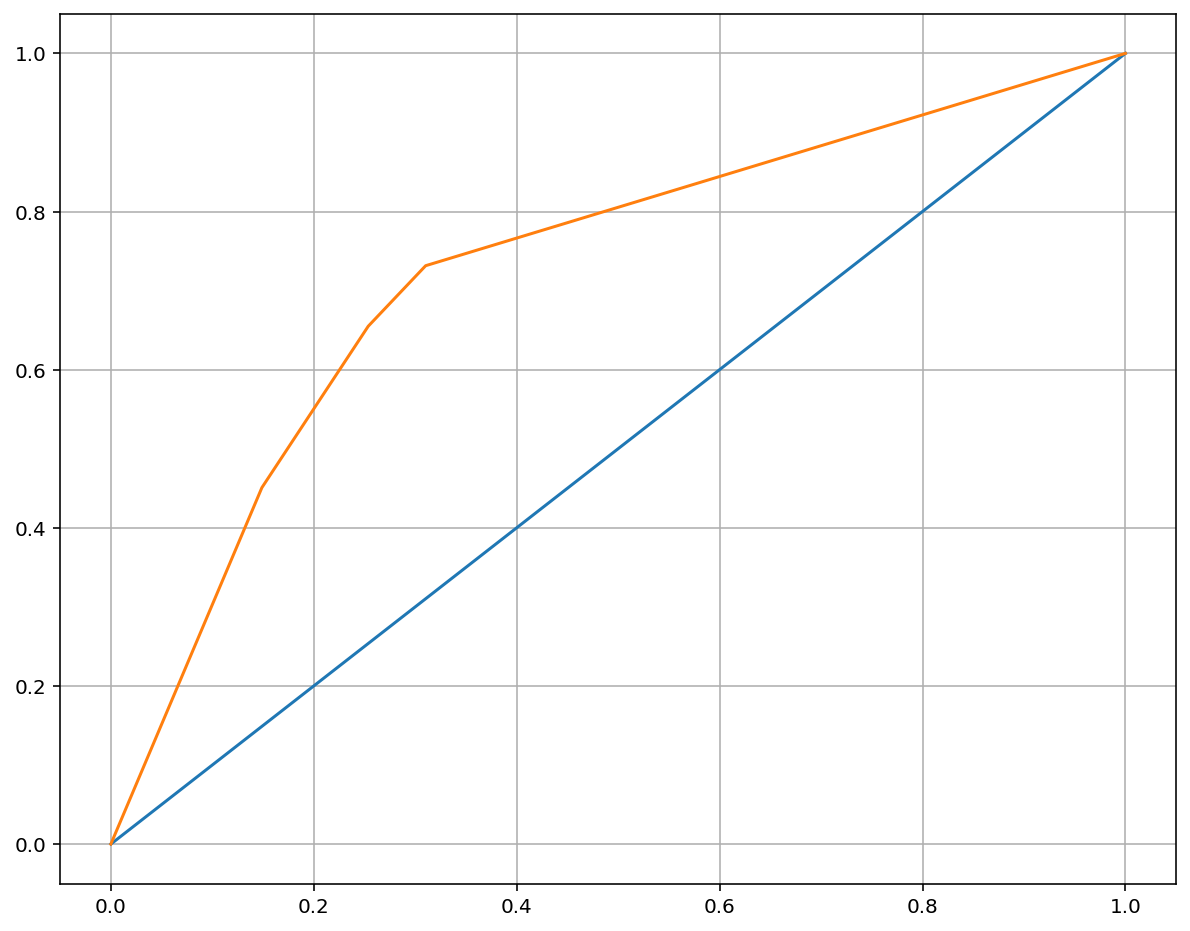

In [28]:
# ROC 커브 그리기

import matplotlib.pyplot as plt
%matplotlib inline

pred_proba = wine_tree.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
#plt.plot(fpr, label='fpr')
#plt.plot(tpr, label='tpf')
plt.grid()
#plt.legend()
plt.show()

In [ ]:
# 파란색 선 왜 생기는지 파악 후 삭제 필요